In [1]:
%run ./../../utils/commonImports.py
%run ./../../utils/tradingImports.py
%matplotlib inline

# Load data

In [5]:
df = read_tsv('D:\\Dropbox\\My work\\krypl-project\\dataLabeled\\return-01-within-day.tsv')
df.head()

,timestamp,period,open,high,low,close,volume,quoteVolume,weightedAverage,date,maxReturn,tillMax,minReturn,label
0,1483225200,5min,964.0000,964.0000,964.0000,964.0000,3.7374,0.0039,964.0000,2017-01-01 00:00:00,0.0109,142,-0.0072,True
1,1483225500,5min,962.8600,962.8600,962.8600,962.8600,74.4955,0.0774,962.8600,2017-01-01 00:05:00,0.0121,141,-0.0061,True
2,1483225800,5min,964.0000,964.0000,962.8600,962.8600,273.3070,0.2837,963.2768,2017-01-01 00:10:00,0.0121,140,-0.0061,True
3,1483226100,5min,964.0000,964.0000,964.0000,964.0000,69.1332,0.0717,964.0000,2017-01-01 00:15:00,0.0109,139,-0.0072,True
4,1483226400,5min,964.0000,965.0000,962.8600,965.0000,"3,050.4950",3.1637,964.2074,2017-01-01 00:20:00,0.0106,139,-0.0083,True


# Consecutive points with true label

In [13]:
consecutive_trues = [0] * len(df)
for i in range(1, len(df)):
    row = df.iloc[i, :]
    if  row['label']:
        consecutive_trues[i] = consecutive_trues[i-1] + 1

df['consecutiveTrues'] = consecutive_trues

C:\Anaconda3\envs\crypto36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


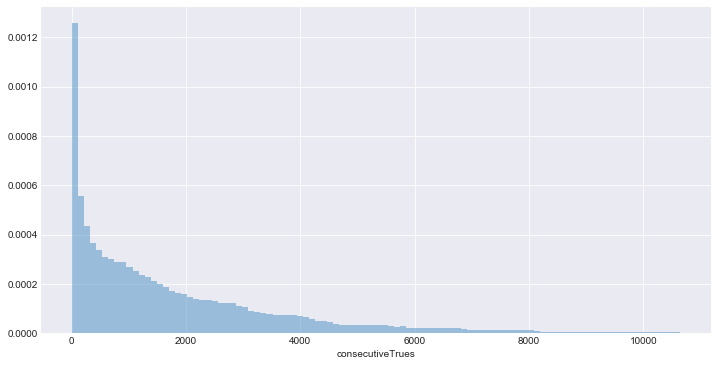

In [26]:
plt.figure(figsize=[12, 6])
df_true = df[df['label'] == True]
sns.distplot(df_true['consecutiveTrues'], bins=100, kde=False, norm_hist=True)